In [1]:
import sys, os, getpass
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

user = getpass.getuser()

if user == "sidsel":
    parquet_path = "/home/sidsel/workspace/sparkdata/parquet"
elif user == "svanhmic":
    parquet_path = "/home/svanhmic/workspace/data/DABAI/sparkdata/parquet"

/home/svanhmic/workspace/DABAI/WorkflowCleaning


In [81]:
from shared.create_dummy_data  import DummyData
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql import types as TY
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt 

In [26]:
dd = DummyData()

In [40]:
#examples on splitting
ddx = dd.df[dd.df["x"] > 0.5]
ddx.show(5)

#slicing a data frame is as follows

ddy = dd.df["label","x"]
ddy.show(5)

+-----+------------------+-------------------+------------------+
|label|                 x|                  y|                 z|
+-----+------------------+-------------------+------------------+
|    3|0.6027417789147873| 0.9407332838094374|0.4616960715027788|
|    3|0.5942069363193099| 0.5960731145407019|0.6997337186312668|
|    2|0.8004073184693896| 0.4239620162209272|0.9230465495573605|
|    1|0.8323607541013331| 0.7989445855076183|0.8230200089426482|
|    5|0.7444021960050392|0.32301607763693574|0.4982675080349952|
+-----+------------------+-------------------+------------------+
only showing top 5 rows

+-----+------------------+
|label|                 x|
+-----+------------------+
|    3|0.6027417789147873|
|    3|0.5942069363193099|
|    3|0.0879677805000082|
|    2|0.8004073184693896|
|    0|0.4012197999191627|
+-----+------------------+
only showing top 5 rows



In [83]:
def subtract_vectors(vector_a: np.ndarray , vector_b):
    return vector_a - vector_b

#create a column with random variable.l
udf_random_vector = F.udf(lambda: Vectors.dense(np.random.chisquare(3,3)),VectorUDT())
udf_subtract_vector = F.udf(lambda vector_a,vector_b: Vectors.dense(subtract_vectors(vector_a,vector_b)),VectorUDT())

vector_ass = VectorAssembler(inputCols=[i for i in ddx.columns if i != "label"],outputCol="features")
vectorized_ddx = vector_ass.transform(ddx)["label","features"]
vectorized_ddx = vectorized_ddx.withColumn("random_vector",udf_random_vector()).withColumn("difference",udf_subtract_vector("features","random_vector"))
vectorized_ddx.show()

+-----+--------------------+--------------------+--------------------+
|label|            features|       random_vector|          difference|
+-----+--------------------+--------------------+--------------------+
|    3|[0.60274177891478...|[0.80797476578955...|[-0.2052329868747...|
|    3|[0.59420693631930...|[4.02902182374742...|[-3.4348148874281...|
|    2|[0.80040731846938...|[0.83606093864884...|[-0.0356536201794...|
|    1|[0.83236075410133...|[8.57348850685520...|[-7.7411277527538...|
|    5|[0.74440219600503...|[6.43732713608765...|[-5.6929249400826...|
|    3|[0.50142296061179...|[1.83787089989946...|[-1.3364479392876...|
|    0|[0.72699383084082...|[1.77662838678695...|[-1.0496345559461...|
|    5|[0.66823923873326...|[4.68209529741462...|[-4.0138560586813...|
|    0|[0.72496898922961...|[0.83606093864884...|[-0.1110919494192...|
|    2|[0.79649425675415...|[8.57348850685520...|[-7.7769942501010...|
|    4|[0.89335848568893...|[6.43732713608765...|[-5.5439686503987...|
|    4

In [76]:

sb.distplot()
plt.show()

In [6]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

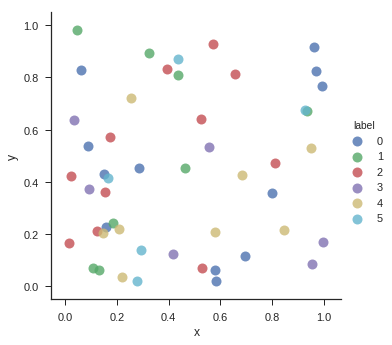

In [7]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('x', 'y',
           data=dd.df.toPandas(),
           fit_reg=False,
           hue="label",  
           scatter_kws={"marker": "D",
                        "s": 100})